#### Reference materials

1. **Introduction to Statistics** -David M Lane
2. **OpenIntro Statistics** - David M Diez

In [1]:
#some generic imports

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special

### Population and Samples

Self evident. 
In statistics, we often rely on a sample --- that is, a small subset of a larger set of data --- to draw inferences about the larger set. The larger set is known as the population from which the sample is drawn.

 - **Mean** - Average value.
 
$$\color{blue}{Mean =  \frac{\Sigma^{n}(x)}{n}}$$


 - **Median** - Middle value
 
If count is odd, the median is the value at (n+1)/2,
else it is the average of n/2 and (n+1)/2

 - **Mode** - Most Frequent value 
 
 
 - **Variance** - Mean of squared distance of sample to its mean
 
 $$\color{blue}{variance = \frac{\Sigma({x - {x_m}})^2}{n-1}}$$
 
 Note that in case of population (as against to sample), the formula for variance will be slightly different. Instead of denominator $n-1$, we have $n$ as denominator in case of variance of population. 
 
 
 - **Standard Deviation** - Square root of variance

$$\color{blue}{\sigma = \sqrt{variance}}$$
 
 - **Standard Error (of Mean)** - For sample standard deviation `s` and number of samples `n`, 
 
 $$\color{blue}{Standard\;Error =  \frac{s}{\sqrt{n}}}$$
 
 - **Covariance**
 
 $$\color{blue}{\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}}$$ 
 
 - **Correlation**
  
  $$\color{blue}{\frac{1}{n-1}\sum_{i=1}^n(\frac{x_i-\bar{x}}{s_x})( \frac{y_i-\bar{y}}{s_y})}$$

#### Covariance


Whereas variance
measures how a single variable deviates from its mean, covariance measures how two
variables vary in tandem from their means

In [95]:
import pandas as pd
df = pd.DataFrame([(1, 1), (2, 3), (2,3), (1, 2)], columns=['dogs', 'cats'])
df

,dogs,cats
0,1,1
1,2,3
2,2,3
3,1,2


In [96]:
df.cov()

,dogs,cats
dogs,0.333333,0.500000
cats,0.500000,0.916667


The values in main diagonal line is variance for respective variable. That is the element (1,1) is variance for 'dog' variable. Similarily, element (2,2) is variance for 'cat'.

The other elements, - (1,2) and (2,1) -  are covariance for variables 'dogs' and 'cats').




In [98]:
(df['dogs']).var() #(1,1) element

0.3333333333333333

In [97]:
(df['cats']).var() #(2,2) element

0.9166666666666666

In [99]:
a = (df['dogs'] - df['dogs'].mean())*(df['cats'] - df['cats'].mean())
cov = sum(a)/3 #3 = 4 -1 = n -1
cov   # (1,2) and (2,1) element

0.5

#### Correlation

In [100]:
df.corr()

,dogs,cats
dogs,1.000000,0.904534
cats,0.904534,1.000000


In [101]:
df.values

array([[1, 1],
       [2, 3],
       [2, 3],
       [1, 2]], dtype=int64)

##### Be cautious when Using `np.cov`

In Pandas, variables are represented by columns while observations by rows. In Numpy, it is other way round (with parameter `rowvar` set to default `True`).

In [102]:
np.cov(df) #different from what was calculated in Pandas

array([[0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0.5],
       [0. , 0.5, 0.5, 0.5],
       [0. , 0.5, 0.5, 0.5]])

In [103]:
np.cov(df, rowvar = False) #same as Pandas

array([[0.33333333, 0.5       ],
       [0.5       , 0.91666667]])

In [104]:
x = [1,2,2,1]
y = [1,3,3,2]
X = np.vstack((x,y))
X

array([[1, 2, 2, 1],
       [1, 3, 3, 2]])

In [105]:
df1 = pd.DataFrame(X)
df1

,0,1,2,3
0,1,2,2,1
1,1,3,3,2


In [106]:
df1.T.cov()

,0,1
0,0.333333,0.500000
1,0.500000,0.916667


In [107]:
np.cov(X) #now this is same as was calculated in Pandas.

array([[0.33333333, 0.5       ],
       [0.5       , 0.91666667]])

### Percentiles

There is no universally accepted definition of a percentile. Using the 65th percentile as an example, the 65th percentile can be defined as the lowest score that is ***greater than*** 65% of the scores. This is the way we defined it above and we will call this “Definition 1.” The 65th percentile can also be defined as the smallest score that is ***greater than or equal*** to 65% of the scores. This we will call “Definition 2.” Unfortunately, these two definitions can lead to dramatically different results, especially when there is relatively little data. Moreover, neither of these definitions is explicit about how to handle rounding. We'll stick to following method to compute the percentile. 

Let's consider the following example. Consider the 25th percentile for the 8 numbers in Table 1. Notice the numbers are given ranks ranging from 1 for the lowest number to 8 for the highest number.


Number|Rank
------|----
3|1
5|2
7|3
8|4
9|5
11|6
13|7
15|8

The first step is to compute the rank (R) of the 25th percentile. This is done using the following formula:-

$$R = P/100*(N+1)$$

where **P** is the desired percentile (25 in this case) and **N** is the number of numbers (8 in this case). Therefore,

$$R = 25/100*(9) = 2.25$$

If R is an integer, the Pth percentile is be the number with rank R. When R is not an integer, we compute the Pth percentile by interpolation as follows:

1. Define IR as the integer portion of R (the number to the left of the decimal point). For this example, IR = 2.
2. Define FR as the fractional portion of R. For this example, FR = 0.25.
3. Find the scores with Rank IR and with Rank IR + 1. For this example, this means the score with Rank 2 and the score with Rank 3. The scores are 5 and 7.
4. Interpolate by multiplying the difference between the scores by FR and add the result to the lower score. For these data, this is (0.25)(7 - 5) + 5 = 5.5.

Therefore, the 25th percentile is 5.5. If we had used the first definition (the smallest score greater than 25% of the scores), the 25th percentile would have been 7. If we had used the second definition (the smallest score greater than or equal to 25% of the scores), the 25th percentile would have been 5.

**Note** - Numpy uses following formula to calculate the rank. [see this](https://en.wikipedia.org/wiki/Percentile#Linear_interpolation_between_closest_ranks) -

$$R = P/100*(N-1)+1$$

In [20]:
x = [3,5,7,8,9,11,13,15]

for i in ['linear', 'lower', 'higher', 'midpoint', 'nearest']: 
    a = np.percentile(x, 25, interpolation =  i)
    print(i, a)

linear 6.5
lower 5
higher 7
midpoint 6.0
nearest 7


### Variance Sum Law I

there are many occasions in which it is important to know the variance of the sum of two variables. Consider the following situation: (a) you have two populations, (b) you sample one number from each population,
and (c) you add the two numbers together. The question is, “What is the variance of this sum?” For example, suppose the two populations are the populations of 8- year old males and 8-year-old females in Houston, Texas, and that the variable of interest is memory span. You repeat the following steps thousands of times: (1)
law I sample one male and one female, (2) measure the memory span of each, and (3) sum the two memory spans. After you have done this thousands of times, you compute the variance of the sum. It turns out that the variance of this sum can be computed according to the following formula:

$${\sigma}^2_{sum} ={\sigma}^2_{M}+{\sigma}^2_{F}  $$


where the first term is the variance of the sum, the second term is the variance of the males and the third term is the variance of the females. 

The formula for the variance of the difference between the two variables (memory span in this example) is shown below. Notice that the expression for the difference is the same as the formula for the sum.

$${\sigma}^2_{difference} ={\sigma}^2_{M}+{\sigma}^2_{F}  $$

More generally, the variance sum law can be written as follows:

$${\sigma}^2_{X\pm{Y}} ={\sigma}^2_{X}+{\sigma}^2_{Y}  $$

Important. These formulas for the sum and difference of variables given above only apply when the variables are independent. 


In [30]:
pop_1 = (5*np.random.randn(1000))
pop_2 = (5*np.random.randn(1000))

np.var(pop_1), np.var(pop_2),

(24.63674464778196, 24.431583355572656)

In [31]:
samp = pop_1[:100]+pop_2[:100]
np.var(samp),np.var(pop_1)+np.var(pop_2)

(49.911579809635704, 49.068328003354615)

### Variance Sum Law II

Recall that when the variables X and Y are independent, the variance of the sum or
difference between X and Y can be written as follows:

$${\sigma}^2_{X\pm{Y}} ={\sigma}^2_{X}+{\sigma}^2_{Y}  $$

When X and Y are correlated, following formula should be used -

$${\sigma}^2_{X\pm{Y}} ={\sigma}^2_{X}+{\sigma}^2_{Y} \pm2\rho{\sigma_X}{\sigma_Y} $$

Where $\rho$ is correlation between X and Y in the population. 

For example, if the variance of the verbal SAT were 10,000, the variance of the quantitative SAT were 11,000 and the correlation between these two tests were 0.50 then the variance of total (verbal + quantitative) would be - 

### Bivariate data and Pearson Correlation

The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. It is referred to as Pearson's correlation or simply as the correlation coefficient.

Pearson's $r$ can range from -1 to 1. An $r$ of -1 indicates a perfect negative linear relationship between variables, an $r$ of 0 indicates no linear relationship between variables, and an $r$ of 1 indicates a perfect positive linear relationship between variables. 

#### Calculating Pearson $r$

Let's say we have following paired data - 

|X|Y|
|--|---|
|1|4|
|3|6|
|5|10|
|5|12|
|6|13|


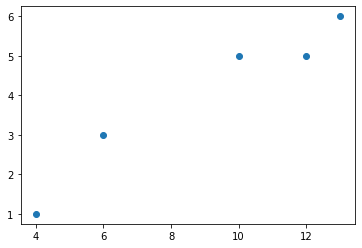

In [2]:
import matplotlib.pyplot as plt
X = [1,3,5,5,6]
Y = [4,6,10,12,13]

plt.scatter(Y,X)

In [4]:
import numpy as np

x_m = np.mean(X) 
y_m = np.mean(Y)
x_m, y_m


(4.0, 9.0)

Based on above data we prepare following table - 

||$X$|$Y$|$x$|$y$|$xy$|$x^2$|$y^2$|
|-|-|-|-|-|-|-|-|
||1|4|-3|-5|15|9|25|
||3|6|-1|-3|3|1|9|
||5|10|1|1|1|1|1|
||5|12|1|3|3|1|9|
||6|13|2|4|8|4|16|
|Total|20|45|0|0|30|16|60|
|Mean|4|9|0|0|6|||

Here values of $x$ are calculated by subtracting $X$ from mean. Ditto for $y$. Now we use the following formula - 

$$r =  \frac{\Sigma{xy}}{\sqrt{\Sigma{x^2}\Sigma{y^2}}}$$



In [5]:
r  = 30/np.sqrt(16*60)
r

0.9682458365518541

In [6]:
10000+11000+2*.5*np.sqrt(10000)*np.sqrt(11000)

31488.088481701518

The variance of difference is -

In [7]:
10000+11000-2*.5*np.sqrt(10000)*np.sqrt(11000)

10511.911518298484

In case we have variances and correlation for samples, we use sample variances and correlation.

### Histogram and KDE

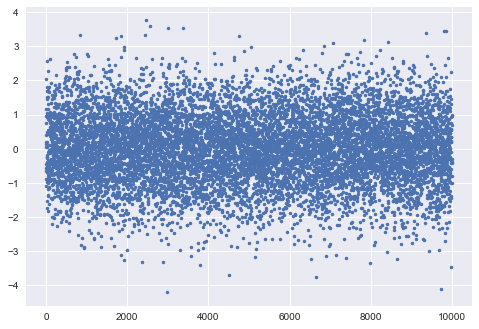

In [38]:
x = np.random.randn(10000)
plt.plot(x,'.');

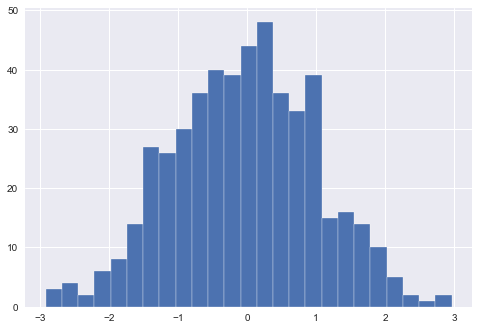

In [109]:
plt.hist(x, bins = 25);

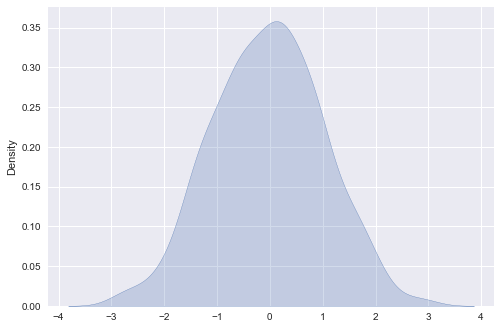

In [110]:
sns.kdeplot(x, shade = True);

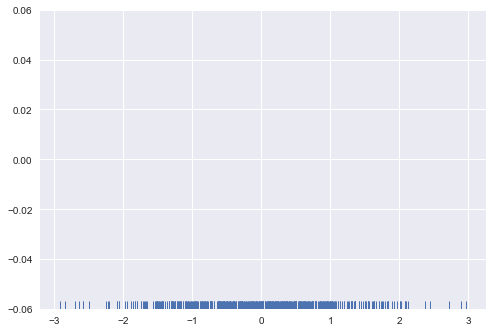

In [111]:
sns.rugplot(x);


#### Box Plot



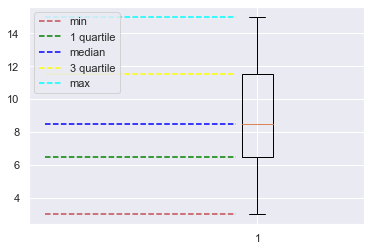

In [22]:
x = [3,5,7,8,9,11,13,15]

plt.boxplot(x);

percentile= [(0, 'min','r'),(25, '1 quartile','green'),(50, 'median','blue'),(75,'3 quartile','yellow'),(100, 'max','cyan')]

for p, label, color in percentile:
    plt.hlines(np.percentile(x,p), 0,.9, colors = color, linestyles = '--', label = label)

plt.legend()

#### Outliers 

In above plot, we don't see any outlier as our dataset contains no outlier value. Let's change our dataset and plot it again -

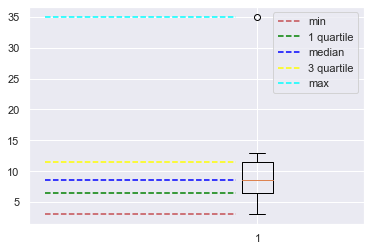

In [25]:
x = [3,5,7,8,9,11,13,35]

plt.boxplot(x);

percentile= [(0, 'min','r'),(25, '1 quartile','green'),(50, 'median','blue'),(75,'3 quartile','yellow'),(100, 'max','cyan')]

for p, label, color in percentile:
    plt.hlines(np.percentile(x,p), 0,.9, colors = color, linestyles = '--', label = label)

plt.legend()

Now compare the above plot with the earlier one. The small circle at the top of plot represents the outlier in our data. To decide on outliers, we calculate $Q3$ (75 quartile) and $Q1$ (25 quartile). These values are represented by upper and lower sides of box in boxplot. 

Now $Q3 + 1.5*(Q3-Q1)$ will represent the *maximum value* and $Q1 - 1.5(Q3-Q1)$ the *minimum value* which will not be considered outliers. Any value beyond this will be considered outlier.  

#### Q -Q Plot

Let us assume we have a spinner which gives a random number between 0 and 1. We spin it 5 times and we get following following values -

In [112]:
l = [.41, .24, .59, .03, .67]

In [113]:
sorted(l)

[0.03, 0.24, 0.41, 0.59, 0.67]

We expect a uniform distribution to model these data. If the sample data were “perfect,” then on average there would be an observation in the middle of each of the 5 intervals: 0 to .2, .2 to .4, .4 to .6, and so on. Table below shows the 5 data points (sorted in ascending order) and the theoretically expected value of each based on the assumption that the distribution is uniform (the middle of the interval).

|Sample value |Rank|Middle of the i-th interval|
|-------------|----|---------------------------|
|.03|1|.1|
|.24|2|.3|
|.41|3|.5|
|.59|4|.7|
|.67|5|.9|

In [114]:
exp = [.1,.3,.5,.7,.9]

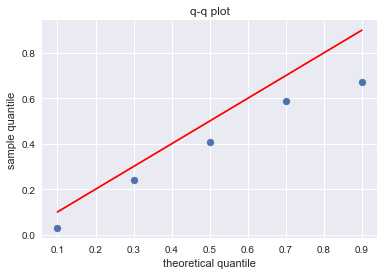

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(exp,sorted(l))
plt.plot(exp, exp, color = 'red')
plt.title("q-q plot")
plt.xlabel('theoretical quantile')
plt.ylabel("sample quantile");

Above plot shows that our data roughly follows a straight line which indicates samples are from a uniform distribution.

Q-Q plot definition can be extended to any continuous density. Above we used q-q plot in the context of uniform distribution but it can also be used to test whether our data has come from a standard normal distribution. 

Consider following data points - 


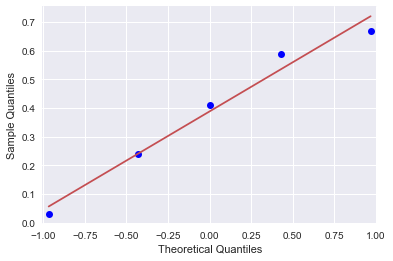

In [123]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.array(l), line = 'r');

In [12]:
n = [-1.96, -.78, .31, 1.15, 1.31]


Since the sample size is 5, we can think of dividing a standard normal distribution in 5 equal intervals: 0-20%, 20-40% and so on. As we did in the case of uniform distribution, we focus on middle of each interval (10%, 30%..). For each interval, we calculate the $z-value$ -

In [13]:
import numpy as np
from scipy.stats import norm
inv =[.1,.3, .5, .7, .9]

inv = np.round(norm.ppf(inv),2)

In [14]:
inv

array([-1.28, -0.52,  0.  ,  0.52,  1.28])

The area between -$\infty$ and -1.28 is .1. Similarily, the area between -$\infty$ and -.52 is .3. 

(-3.0, 3.0)

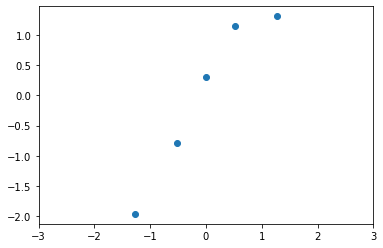

In [15]:
plt.scatter(inv, n)
plt.xlim(-3,3)

Again, we can see that our plot roughly follows a straight line which means we can be fairly confident that our data came from a standard normal distribution. Note that, n = 5 is small sample size. The bigger the sample size, the closer will be our plot to a straight line. 

### Continuous probability distributions

### Uniform Distribution

<br>
The simplest continuous probability distribution has a flat probability density function between two points $a$ and $b$, say, as illustrated below. It is called a uniform distribution between $a$ and $b$.

In order for the area under the probability density function to be equal to 1, it must have a
height of $1/(b − a)$, so that

$$f(x) = \frac{1}{b − a}$$

<br>

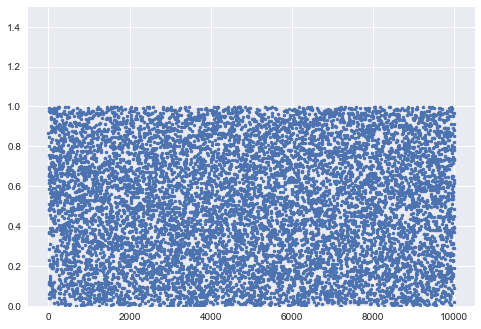

In [44]:
x = np.random.rand(10000)
plt.plot(x,'.')
plt.ylim(0,1.5);

It is easy to see that above plot is uniformally distributed. 

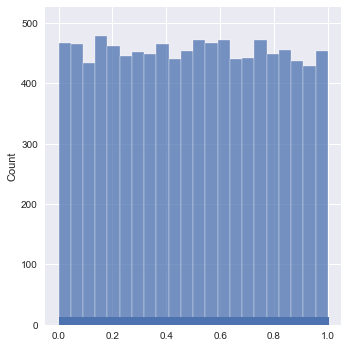

In [45]:
sns.displot(x, rug = True)

### Normal Distribution



We should keep the following ideas in mind about the curve that describes a continuous distribution (like the normal distribution). First, the area under the curve equals 1. Second, the probability of any exact value of `X` is 0. Finally, the area under the curve and bounded between two given points on the X-axis is the probability that a number chosen at random will fall between the two points.

The probability density of normal distribution is - 
<div class="alert alert-block alert-warning">
$$p(x) = \frac{1}{\sigma\sqrt{ 2 \pi}}e^{-\frac{1}{2} {(\frac{x - \mu }{\sigma})}^2 }$$
</div>

#### The Z-Score

The Z-score of an observation is the number of standard deviations it falls above or below the mean. We compute the Z-score for an observation $x$ that follows a
distribution with mean $\mu$ and standard deviation $\sigma$ using
$$z =  \frac{x - \mu}{\sigma}$$

#### Z-Score and Percentile for an Observation

Given a standard normal distribution, what percentage of values of this distribution is below 1? In other words, calculate the percentile of 1.

In [126]:
from scipy.stats import norm
norm.cdf(1, 0, 1)

0.8413447460685429

Though we can look up the percentile of `1` by calculating its `z-score` and then referring to normal probability table, the better way is to just calculate the `cdf` for sample `1`. This will directly give you the percentile without calculating `z-score` and referring to normal probability table.

In [127]:
s = np.random.normal(50,10,25)
stats.describe(s)

DescribeResult(nobs=25, minmax=(22.598579673129002, 62.99229393183553), mean=49.37688182298493, variance=90.68818640086083, skewness=-0.6967331954859833, kurtosis=0.6408293953970174)

(18.0, 80.0)

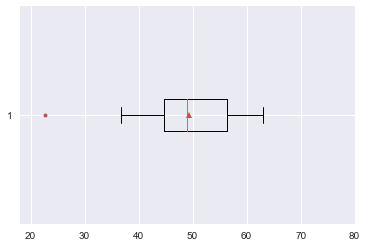

In [128]:
plt.boxplot(s, vert = False, sym = '.r', showmeans = True)
plt.xlim(18,80)

#Caution - When both seaborn and matplotlib are imported, boxplot using matplotlib doesn't show outliers. Either draw boxplot-
# - using seaborn or use the method using 'sym' parameter as used here.

#### Cumulative Distribution Function

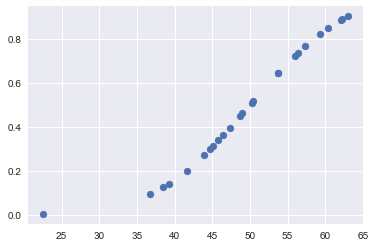

In [129]:
plt.scatter(s, norm.cdf(s,50,10))    

#### Shapiro- Wilk test

omitted for the time being

##### The 68-95-99.7% Rule

  All normal density curves satisfy the following property which is often referred to as the Empirical Rule.

- 68% of the observations fall within 1 standard deviation of the mean, that is, between and $\mu-\sigma$ and $\mu+\sigma$ . 
- 95% of the observations fall within 2 standard deviations of the mean, that is, between and $\mu-2\sigma$ and $\mu+2\sigma$ . 
- 99.7% of the observations fall within 3 standard deviations of the mean, that is, between and $\mu-3\sigma$ and $\mu+3\sigma$. 

To be precise, this rule would be '68.2-95.4-99.7' Rule

#### Area under Curve for Normal Distribution

The total area under curve is always equal to 1. In case of standard normal distribution, let us say we want to find out the probability that a random observation will fall between, say, -2 and 2. For this, we need to calculate the area under curve from x = -$\infty$ to 2 and -2 and compute the difference between those two values. 



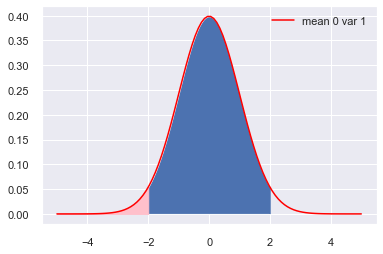

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
sns.set()

x = np.linspace(-5,5,100)
x1 = np.linspace(-5,2,100)
x2 = np.linspace(-5,-2,10)
plt.plot(x, norm.pdf(x, loc = 0, scale = 1), '-',color = 'red', label = 'mean 0 var 1')
plt.vlines(2,0,norm.pdf(2,0,1))
plt.fill_between(x1, norm.pdf(x1, 0,1), 0)
plt.fill_between(x2, norm.pdf(x2, 0,1), 0, color = 'pink')
plt.legend()


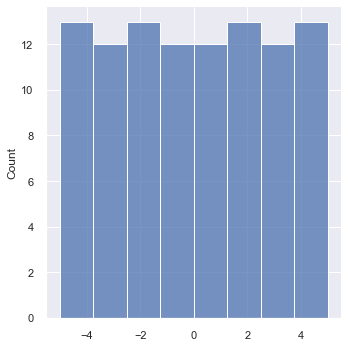

In [47]:
sns.displot(x)

We are interested in finding area of blue colored region. For this, we first caculate the area of pink region (probability for a sample lying between - $\infty$ to -2). Then we calculate the area of both pink shaded region AND blue shaded region (probability for a sample lying between -$\infty$ to 2. Finally we subtract the former from the later to get the area.

We use scipy's `stats.norm.cdf` function to calculate the area.

In [131]:
norm.cdf(2, loc = 0, scale = 1) - norm.cdf(-2, loc = 0, scale = 1)

0.9544997361036416

This means the probability that a random value would lie between -2 and 2 in a normally distributed distribution population is .9544


### Sampling Distribution of Mean



#### Mean

The mean of the **sampling distribution of the mean** is the mean of the population from which the scores were sampled. Therefore, if a population has a mean μ, then the mean of the sampling distribution of the mean is also μ. 

#### Variance
The variance of the sampling distribution of the mean is ${\sigma}^2/N$

That is, the variance of the sampling distribution of the mean is the population
variance ($\sigma$) divided by $N$, the sample size (the number of scores used to compute a
 mean). Thus, the larger the sample size, the smaller the variance of the sampling distribution of the mean.
 
This expression can be derived very easily from the variance sum law. Let's begin by computing the variance of the sampling distribution of the sum of three numbers sampled from a population with variance $σ^2$. The variance of
the sum would be $σ^2 + σ^2 + σ^2$. For N numbers, the variance would be N$σ^2$. Since the mean is $1/N$ times the sum, the variance of the sampling distribution of the mean would be $1/N^2$ times the variance of the sum, which equals $σ^2/N$.
The standard error of the mean is the standard deviation of the sampling distribution of the mean. It is therefore the square root of the variance of the sampling distribution of the mean and can be written as:

 
 $${Standard\;Error\;of\;Mean =  \frac{\sigma}{\sqrt{N}}}$$
 
 However, we rarely know the variance of population. To address this we use the variance of sample. In that case, the formula we use is - 
 
 $$Standard\;Error =  \frac{s}{\sqrt{N}}$$
 
Where $s$ is the standard deviation of sample. 
 


#### Central Limit Theorem
The central limit theorem states that:
>Given a population with a finite mean $μ$ and a finite non- zero variance $σ^2$, the sampling distribution of the mean
approaches a normal distribution with a mean of $μ$ and a variance of $σ^2/N$ as $N$, the sample size, increases.

The expressions for the mean and variance of the sampling distribution of the mean are not new or remarkable. What is remarkable is that regardless of the shape of the parent population, the sampling distribution of the mean approaches a normal distribution as $N$ increases. 

Let us generate a 'population' of some measurement having 10000 observations. 

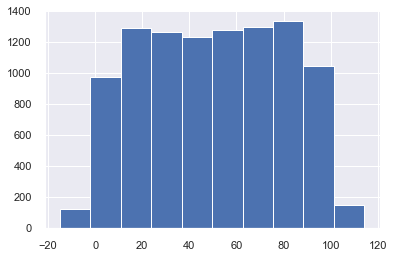

In [48]:
np.random.seed(123)
data = np.random.randint(0,101, 10000) - (5*np.random.randn(10000))

plt.hist(data);

Histogram for our data is shown above. It is definitely not normally distributed. We calculate the population mean and standard deviation so that we can compare them with our estimates.

In [49]:
pop_mean = np.mean(data)
pop_std = np.std(data)


pop_mean, pop_std

(50.340928613386296, 29.59223779433743)

Let us take 200 samples with each sample having 100 random observations. We prepare a list of mean for each sample. 

In [50]:
l = []
for i in range(200):
    a = np.mean(np.random.choice(data, 100))
    l.append(a)
    
len(l)

200

Below is the histogram for **sampling distribution of mean**. Note that this histogram is centered exactly around the population mean. Also note that, these sample means are approximately normally distributed. 

<div class="alert alert-block alert-warning">

**Sampling distribution**

The sampling distribution represents the distribution of the point estimates based on samples of a fixed size from a certain population. It is useful to think of a particular point estimate as being drawn from such a distribution. Understanding the
concept of a sampling distribution is central to understanding statistical inference.</div>


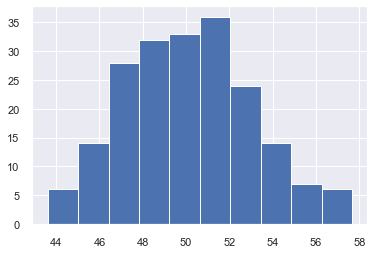

In [51]:
plt.hist(l);

Calculating the standard distribution for this distribution of means - 

In [52]:
np.std(l)

2.9797559928445434

What we just calculated is called **Standard Error of Mean**. This value indicates the 'spread' of sampling means around true population means. 

But imagine we have only one sample (of 100 observations). Obviously, we can't calculate SE of mean from one sample alone. Earlier, we were able to calculate this because we have multiple samples (200). 

Suppose we know the population standard deviation. We have already calculated this above. Then we can calculated SE as shown below -   

<div class="alert alert-block alert-warning">

**Standard error of an estimate**

The standard deviation associated with an estimate is called the standard error.
It describes the typical error or uncertainty associated with the estimate.</div>

In [53]:
pop_std/np.sqrt(100) #Standard error when Population Std dev is known. 100 is the sample size

2.959223779433743

Notice that this value is very close close to the SE of mean which we calculated on the basis of smapling distribution mean. 

Usually we don't know the standard deviation for entire population so we use the sample standard deviation provided sample size is more than 30 and population distribution is not strongly skewed. 

In [54]:
b = np.random.choice(data,100)
sample_std = np.std(b)
se_2 = sample_std/10
se_2                  #Standard error when Population std dev not known so we use the sample std dev

#Using sample std dev is viable if sample size is more than 30 and population distribution is not strongly skewed. 

2.8952243911504576


Again, SE of mean calculated here is very close the SE of mean which we caculated in the begining.

## Basic Properties of Point Estimates

So far,we achieved three goals in this section. First, we determined that point estimates from a sample may be used to estimate population parameters. We also determined that these point estimates are not exact: they vary from one sample to another. Lastly, we quantified the uncertainty of the sample mean using what we call the standard error, mathematically
represented in equation $SE\;=\;\frac{\sigma}{\sqrt{n}}$

### Confidence Interval

A point estimate provides a single plausible value for a parameter. However, a point estimate is rarely perfect; usually there is some error in the estimate. Instead of supplying just a point estimate of a parameter, a next logical step would be to provide a plausible *range of values* for the parameter.

A plausible range of values for the population parameter is called a **confidence interval**.

Our point estimate is the most plausible value of the parameter, so it makes sense to build the confidence interval around the point estimate. The standard error, which is a measure of the uncertainty associated with the point estimate, provides a guide for how large we should make the confidence interval.

The standard error represents the standard deviation associated with the estimate, and roughly 95% of the time the estimate will be within 2 standard errors of the parameter. If the interval spreads out 2 standard errors from the point estimate, we can be roughly **95% confident** that we have captured the true parameter:

$$point\;estimate\;\pm\;2\;*\;SE\ \ \ \ \ \ \ \ \ \ \  -\;(eq2)$$

But what does “95% confident” mean? Suppose we took many samples and built a confidence
interval from each sample using Equation (2). Then about 95% of those intervals
would contain the actual mean, $\mu$.

Earlier we calculted SE through various methods and it came out to be approximately 2.95. We also caculated sample means for 200 samples. Let us just pick means of 25 such samples.   

Now, let us try to visualize confidence interval of 95% for given data. We have 25 points from sampling distribution of means (that is means of 25 samples). For each sample  mean, we caculated the range for 95% confidence interval using equation (2).

Since we have 25 ranges for 95% confidence intervals, this means approximately 24 ( ~ 25 x .95) of these ranges will have true population mean in them. 

The following plot confirms this. Confidence interval corresponding to thick blue line doesn't contain true population mean. All other 24 intervals have population means in them. 

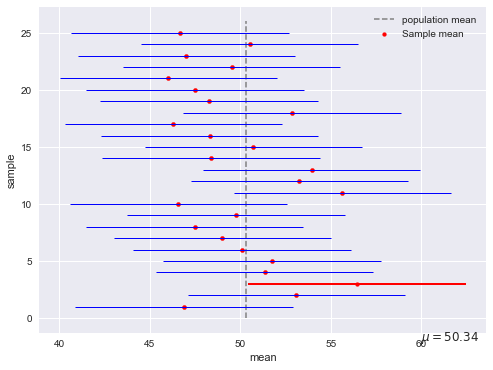

In [56]:
se = 3
plt.style.use('seaborn')
plt.figure(figsize = (8,6))
plt.vlines(pop_mean,0,26, linestyles = '--', color = 'gray', lw = 1.5, label = 'population mean')
for i, j in enumerate(l[:25],1):
    a = j-(2*se)
    b = j+(2*se)
    if not a < pop_mean < b:
        plt.hlines(i,a,b, lw =2, color = 'red')
        plt.scatter(j,i, c = 'red', s = 15)
    else:
        plt.hlines(i,a,b, lw =1, color = 'blue')
        plt.scatter(j,i, c = 'red', s = 18)

plt.scatter([],[], c = 'red', s = 15, label = 'Sample mean')    
plt.xlabel('mean')
plt.ylabel('sample')
plt.text(60,-2,'$\mu = %.2f$' %pop_mean)
plt.legend(scatterpoints = 1,frameon = False)    

Earlier we plotted histogram for 200 samples taken from sampling distribution of means. It was evident that histogram approximately mimicked the normal distribution. 

Now, we'll repeat the process but this time with 100,000 samples.

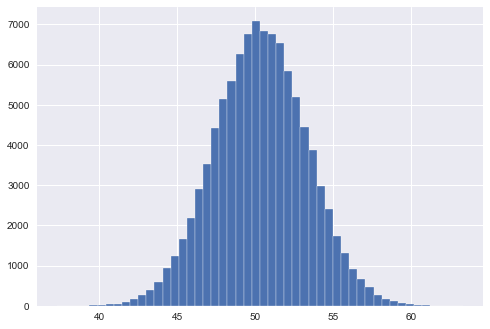

In [57]:
l1 = []
for i in range(100000):
    a = np.mean(np.random.choice(data, 100))
    l1.append(a)
    
plt.hist(l1, bins = 50);    

It can be seen that in present case, histogram is resembling normal distribution far more accurately.

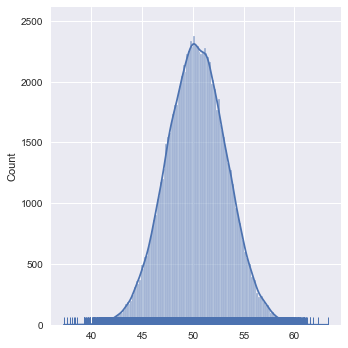

In [58]:
sns.displot(l1, kde = True, rug = True);

The preceeding discussions give us opportunity to introduce one more concept, known as **Central Limit Theorem.**

<div class="alert alert-block alert-warning">

**Central Limit Theorem, informal description -**

If a sample consists of at least 30 independent observations and the data are not strongly skewed, then the distribution of the sample mean is well approximated by a normal model.</div>


The choice of using 2 standard errors in Equation (2) was based on our general guideline that roughly 95% of the time, observations are within two standard deviations of the mean. Under the normal model, we can make this more accurate by using 1.96 in place of 2.

$$\color{blue}{point\;estimate\;\pm\;1.96\;*\;SE\ \ \ \ \ \ \ \ \ \ \  -\;}(eq3)$$

In [59]:
from scipy.stats import norm
norm.cdf(1.96,0,1) - norm.cdf(-1.96,0,1) # 95% values will fall within 1.96 std from mean

#This gives the intuition behind using 1.96 s.d. for 95% confidence interval

0.950004209703559

In [60]:
norm.cdf(3,0,1) - norm.cdf(-3,0,1) # 99% values will fall within 1.96 std from mean

#This gives the intuition behind using 3 s.d. for 99.7% confidence interval

0.9973002039367398

### Hypothesis Testing

We have earlier generated a contrived example of population $x$. Let us assume this this data belong to year 2018. Let us generate a sample with 100 observation - 

In [61]:
sam_18 = np.random.choice(data,100)
sample_std = np.std(sam_18)
sample_mean = np.mean(sam_18)
s_e = sample_std/10
sample_mean, sample_std, s_e            #Standard error when Population std dev not known so we use the sample std dev

#Using sample std dev is viable if sample size is more than 30 and population distribution is not strongly skewed. 

(50.91355809692017, 29.421080122339646, 2.9421080122339647)

Suppose we are told that data for year 2017 has the population mean of, say, 52. Now our claim is that there is no difference between 2017 population mean and 2018 population mean. How would you test this hypothesis? Assume that we only have access to 2018 sample data.   

 95% Confidence interval for 2018 year sample -

In [62]:
aa = sample_mean - (1.96*s_e)
bb = sample_mean + (1.96*s_e)

aa, bb

(45.1470263929416, 56.68008980089874)

Based on the question we are asked, we can develop two hypothesis -

 - $H_0$ : There is no difference between 2017 population mean and 2018 population mean.
 - $H_A$ : There is significant difference between 2017 population mean and 2018 population mean.

We can also write these hypotheses in following ways - 

 - $H_0$ : $\mu_{18}$ = 52.
 - $H_A$ : $\mu_{18}$ $\neq$ 52
 
$H_0$ is Null Hypothesis and $H_A$ is alternate hypothesis. 

For year 2018, we calculated 95% CI as (48.52, 60.14). Also, we have no access to 2018 population mean. We note that 2017 population mean (52) falls in above confidence interval. This means we can not *reject* our null hypothesis. (Failure to reject the null hypothesis doesn't mean null hypothesis is true).

Note that this is **2-sided Hypothesis Testing**.

#### Decision Errors


\(![image hypo.png missing](images/hypo.png)

A **Type 1 Error** is rejecting the null hypothesis when $H_0$ is actually true. A **Type 2 Error** is failing to reject the null hypothesis when the alternative is actually true.

Hypothesis testing is built around rejecting or failing to reject the null hypothesis. That is, we do not reject $H_0$ unless we have strong evidence. But what precisely does strong evidence mean? As a general rule of thumb, for those cases where the null hypothesis is actually true, we do not want to incorrectly reject $H_0$ more than 5% of the time. This
corresponds to a **significance level** of 0.05. We often write the significance level using
$\alpha$ (the Greek letter alpha): $\alpha$ = 0.05.

If we use a 95% confidence interval to evaluate a hypothesis test where the null hypothesis is true, we will make an error whenever the point estimate is at least 1.96 standard errors away from the population parameter. This happens about 5% of the time (2.5% in each tail). Similarly, using a 99% confidence interval to evaluate a hypothesis is equivalent to a significance level of $\alpha$ = 0.01.

A confidence interval is, in one sense, simplistic in the world of hypothesis tests.
Consider the following two scenarios:

 - The null value (the parameter value under the null hypothesis) is in the 95% confidence interval but just barely, so we would not reject H0. However, we might like to somehow say, quantitatively, that it was a close decision.
 - The null value is very far outside of the interval, so we reject $H_0$. However, we want to communicate that, not only did we reject the null hypothesis, but it wasn’t even close. such a case is shown below
 
 ![image hypo1.png missing](images/hypo1.png)
 
 It would be helpful to quantify the strength of the evidence against the null hypothesis. In this case, the evidence is extremely strong.

#### Formal Testing Using `p-values`

The `p-value` is a way of quantifying the strength of the evidence against the null hypothesis and in favor of the alternative. Formally the `p-value` is a conditional probability.

<div class="alert alert-block alert-warning">
**p-value** - The `p-value` is the probability of observing data at least as favorable to the alternative
hypothesis as our current data set, if the null hypothesis is true. We typically use a summary statistic of the data, in this chapter the sample mean, to help compute the `p-value` and evaluate the hypotheses.</div>

***Example*** -  A pole found that college students average about 7 hours sleep per night. Researchers at a rural school are in interested in showing that students at their school sleep longer than 7 hours on average and they wish to demonstrate that using a sample of students from their school. 

We can set up the null hypothesis for this test as a skeptical perspective: the students at this school average 7 hours of sleep per night. The alternative hypothesis takes a new form reflecting the interests of the research: the students average more than 7 hours of sleep. We can write these hypotheses as - 

 - $H_0 : \mu\;=$ 7
 - $H_A : \mu\;\gt\;$7

<div class="alert alert-block alert-warning">
We will find it most useful if we always list the null hypothesis as an equality (e.g.
μ = 7) while the alternative always uses an inequality (e.g. μ 6= 7, μ > 7, or μ < 7).</div>

Using $\mu$ > 7 as the alternative is an example of a one-sided hypothesis test. In this investigation, there is no apparent interest in learning whether the mean is less than 7 hours. Earlier we encountered a two-sided hypothesis where we looked for any clear difference, greater than or less than the null value. 

Back to our example. Researchers conducted a survey on random 110 students and found out their average sleep time was 7.42 hours with standard deviation 1.75 hours. 

The hypothesis test for the sleep study will be evaluated using a $significance\;level$ of $\alpha$ = 0.05. We want to consider the data under the scenario that the null hypothesis is true. In this case, the sample mean is from a distribution that is nearly normal and has mean 7 and standard deviation of about ${SE}_x$ = 0.17. (Recall that SE of mean is the standard deviation of sampling distribution of mean.)

For $\sigma_{sample}$ = 7.42, we calculate the $z\;score$ - 

In [129]:
7.42/np.sqrt(110)

0.7074692412202295

In [63]:
z = (7.42-7)/.17
z

2.470588235294117

For given distribution, our sample mean is 2.47 standard deviations away from distribution mean (very far, actually). 

Now we wish to find the area of the region which lie between $x$ and $\infty$ See below plot for clarity - 

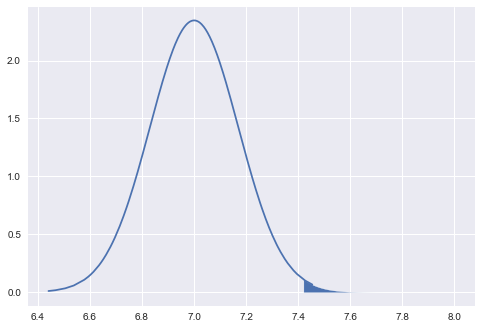

In [64]:
samp = np.random.normal(7,.17,500)
plt.plot(np.sort(samp), norm.pdf(np.sort(samp), 7, .17))
xx = np.linspace(7.42,8,50)
plt.fill_between(xx, norm.pdf(xx,7,.17), 0)

In [65]:
area = 1 - norm.cdf(7.42,7,.17)
round(area,3)

0.007

The shaded area equals to .007. *If the null hypothesis is true, the probability of observing
a sample mean at least as large as 7.42 hours for a sample of 110 students is only 0.007.* That is, if the null hypothesis is true, we would not often see such a large mean.

The value we calculated as .007 is `p-value`. Because `p-value` (= .007) is less than significance level (= .05), we reject the null hypothesis. 

What we observed is so unusual with respect to the null hypothesis that it casts serious doubt on $H_0$ and provides strong evidence favoring $H_A$.

In [66]:
7.42-(1.96*.17),7.42+(1.96*.17) #95% confidence interval

(7.0868, 7.7532)

Again, population mean (= 7) barely touch the range of confidence interval. 

<div class="alert alert-block alert-warning">
`p-value` as a tool in hypothesis testing
The smaller the `p-value`, the stronger the data favor $H_A$ over $H_0$. A small `p-value`
(usually less than 0.05) corresponds to sufficient evidence to reject $H_0$ in favor of $H_A$. </div>

Also -
<div class="alert alert-block alert-warning">
It is useful to draw a picture of the distribution of $\bar{x}$ as though $H_0$ was true
(i.e. $\mu$ equals the null value), and shade the region (or regions) of sample means
that are at least as favorable to the alternative hypothesis. These shaded regions
represent the `p-value`.</div>

The ideas below review the process of evaluating hypothesis tests with `p-values`:

  - The null hypothesis represents a skeptic’s position or a position of no difference. We reject this position only if the evidence strongly favors $H_A$.
  - A small `p-value` means that if the null hypothesis is true, there is a low probability of seeing a point estimate at least as extreme as the one we saw. We interpret this as strong evidence in favor of the alternative.
  - We reject the null hypothesis if the `p-value` is smaller than the significance level,$\alpha$, which is usually 0.05. Otherwise, we fail to reject $H_0$.
  - We should always state the conclusion of the hypothesis test in plain language so non-statisticians can also understand the results.

#### 2-sided Hypothesis Testing with `p-value`s

In preceeding example, we conducted 1-sided hypothesis testing. Now consider following example.

***Example*** -  Earlier we were interested in the case of average sleep time being more than 7 hours. Now another group of researchers from a different college is interested in finding out if students from their college have average sleep time *different* from 7 hours. 

They also conducted a survey with a sample of 122 students and found the mean to be 6.83 hours with standard deviation of 1.8 hours. 

We can write following hypotheses for above problem - 

 - $H_0 : \mu\;=$ 7
 - $H_A : \mu\;\neq\;$7

In [67]:
se_2 = 1.8/np.sqrt(122)
se_2 #standard error of mean

0.16296434287653336

In [68]:
pv_1 = norm.cdf(6.83, 7, .16) #sampling distribution
pv_1

0.144004379001971

In [69]:
pvalue = 2*pv_1
pvalue

0.288008758003942

This `p-value` (= .288) is relatively larger than significance level (= .05) so we shouldn't reject $H_0$. That is, if $H_0$ is true, it would not be very unusual to see a sample mean this far from 7 hours simply due to sampling variation. Thus, we do not have sufficient evidence to conclude that the mean is different than 7 hours. 

We can also see that the population mean (= 7 hrs) falls comfortably within the range of 95% confidence interval. 

In [70]:
6.83-(1.96*.16),6.83+(1.96*.16)

(6.5164, 7.1436)

#### Choosing a Significance Level

Choosing a significance level for a test is important in many contexts, and the traditional level is 0.05. However, it is often helpful to adjust the significance level based on the application. 

If making a Type 1 Error is dangerous or especially costly, we should choose a small significance level (e.g. 0.01). Under this scenario we want to be very cautious about rejecting the null hypothesis, so we demand very strong evidence favoring 
$H_A$ before we would reject $H_0$.

If a Type 2 Error is relatively more dangerous or much more costly than a Type 1 Error, then we should choose a higher significance level (e.g. 0.10). Here we want to be cautious about failing to reject $H_0$ when the null is actually false.

>The significance level selected for a test should reflect the consequences associated with Type 1 and Type 2 Errors.


### $t$ - distribution

We required a large sample in Chapter 4 for two reasons:

 -  The sampling distribution of $\bar{x}$ tends to be more normal when the sample is large.
 -  The calculated standard error is typically very accurate when using a large sample.
 
But it is not always the case when we have sample size big enough.

If the population data are nearly normal, then $\bar{x}$ will also follow a normal distribution, which
addresses the first problem. The accuracy of the standard error is trickier for small sample size, and for this
challenge we’ll introduce a new distribution called the **t-distribution**.

Earlier, for normal model, we used the following formula to calculate the 95% confidence interval -

$$point\;estimate\;\pm\;z_{95}*SE$$

We revise the above formula with slight modification -

$$point\;estimate\;\pm\;t_{df,95}*SE$$

In a sense, both formulae are exactly the same except for one difference: in former case, the distribution was normal while in later case, the distribution is t-distribution. 

Consider following data -

|n|$\bar{x}$|std|min|max|
|---|----|---|----|----|
|19|4.4|2.3|1.7|9.2|



In [56]:
se_t = 2.3/np.sqrt(19)
se_t

0.527656187902292

Now we find the value of $t_{df,95}$ - 

In [57]:
from scipy.stats import t
t.isf(.025,18) #.025 for each tail -> .05 for both tails. 18= dof

2.10092204024096

In [58]:
1-t.cdf(2.1,18)

0.025045202854784177

Our 95% confidence interval would be - 

In [60]:
4.4-(2.1*se_t),4.4+(2.1*se_t)

(3.291922005405187, 5.508077994594814)

### t-distribution

In the **Sampling Distribution of Mean** section and afterwards, we generated an artificial population `data` and experimented with it. We saw that when our (single) sample was large enough, we were able to estimate the population mean and its standard error. The key point was our sample was large enough. 

In [98]:
data = np.random.normal(15,4,10000) + np.random.randn(10000)

np.mean(data), np.std(data)

(15.024143916986409, 4.0836823216746705)

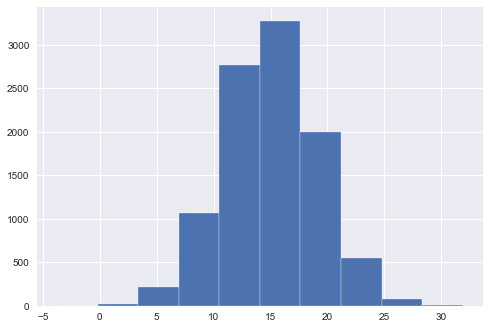

In [102]:
plt.hist(data); #nearly normal distribution

Below we prepared 2 samples, first being of size 150 and second being of size 5, and computed their mean. You can see that mean of larger sample is very close to population mean. However, the same is not true in case of smaller sample.

In [99]:
large_samp = np.random.choice(data, 150)
small_samp = np.random.choice(data, 5)

np.mean(large_samp), np.mean(small_samp)

(15.322643597112261, 11.747084715344192)

In fact, we can plot mean of sample vs sample size as shown below. You can observe that when sample size becomes sufficiently large, its mean approaches population mean within reasonable limit. 

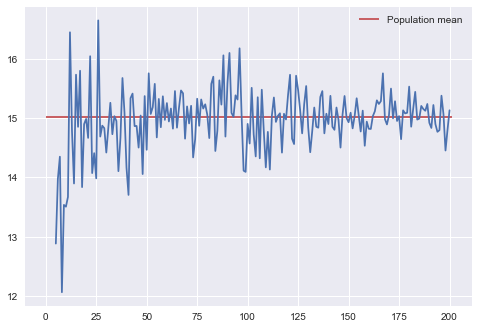

In [100]:
mean_list = []

for i in range (5,201):
    a = np.mean(np.random.choice(data, i))
    mean_list.append(a)
    
plt.plot(range(5,201),mean_list)    
plt.hlines(np.mean(data), 0,201, 'r', label = 'Population mean') 
plt.legend()

In [117]:
l = []

for i in range(200):
    a = np.mean(np.random.choice(data, 100))
    l.append(a)
    
np.mean(l), np.std(l) #mean and std of sampling disttribution of mean

(15.01095373739327, 0.38827266509198666)

In [118]:
np.std(np.random.choice(data, 100))/10  #standard error calculated with one sample

0.3796318019626927

The takeaway is that if our sample size is large eoungh, we can be fairly confident that sample mean and population mean are *almost equal.*

But what if our sample size is small? How do we estimate population mean in that case? 

Additionaly, in normal distributions $95\%$ of the area of a normal distribution is within $1.96$ standard deviations of the mean. Therefore, if you randomly sampled a value from a normal distribution with a mean of $100$, the probability it would be within $1.96σ$ of $100$ is $0.95$. Similarly, if you sample $N$ values from the population, the probability that the sample mean ($M$) will be within $1.96 σM$ of $100$ is $0.95$.

But what if we do not know the standard deviation? You sample $N$ values and compute the sample mean ($s_M$) and estimate the standard error of the mean ($σ_M$) with $s_M$. What is the probability that $M$ will be within $1.96 s_M$ of the population mean ($μ$)? We can't be sure. (this para needs to be understood because we dealt with something like that in confidence interval section)



This is where **t-distribution** comes into picture. 

From Wikipedia - 

> t- distribution is any member of family of continuous probability distributions that arises when estimating the mean of a normally distributed population in situations where the **sample size is too small and the population standard deviation is unknown**.

Note that the normal distribution has relatively more scores in the center of the distribution and the t distribution has relatively more in the tails. The t distribution is therefore leptokurtic. The t distribution approaches the normal distribution as the degrees of freedom increase.

Since the t distribution is leptokurtic, the percentage of the distribution within 1.96 standard deviations of the mean is less than the 95% for the normal distribution. Table 1 shows the number of standard deviations from the mean required to contain 95% and 99% of the area of the t distribution for various degrees of freedom. These are the values of t that you use in a confidence interval. The corresponding values for the normal distribution are 1.96 and 2.58 respectively. Notice that with few degrees of freedom, the values of t are much higher than the corresponding values for a normal distribution and that the difference decreases as the degrees of freedom increase.

<img src="images/t-table.png" width="300" height="400"/>



Suppose we take $n$ samples from a normal distribution with mean $\mu$ and standard deviation $\sigma$. Let $\bar{x}$ and $s$ be the mean and standard deviation of these $n$ samples.  Then the random variable 

<div class="alert alert-block alert-warning">
$$\frac{\bar{x}-\mu}{SE}\;\;\;\;\; \; where \;SE = \frac{s}{\sqrt{n}}$$
</div>

has a **Student's t-distribution** (or simply t-distribution) with n-1 degrees of freedom.
  

t-distribution has mean 0 and variance $(v)/(v-2)$ where $v$ is the degree of freedom. 

In [127]:
mu = np.mean(data)

t_dist = []
for i in range(200):
    a = (np.random.choice(data, 5)) #sample size 5 so dof would be 4
    m, s = np.mean(a), np.std(a)
    t = (m-mu)/(s/np.sqrt(5))
    t_dist.append(t)
    
    
np.mean(t_dist), np.var(t_dist)     #close to ideal value

(-0.1031488941062244, 2.7960443540467077)

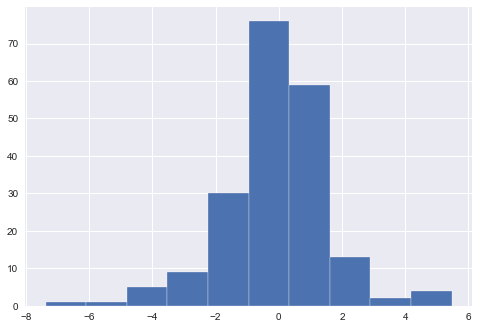

In [128]:
plt.hist(t_dist);

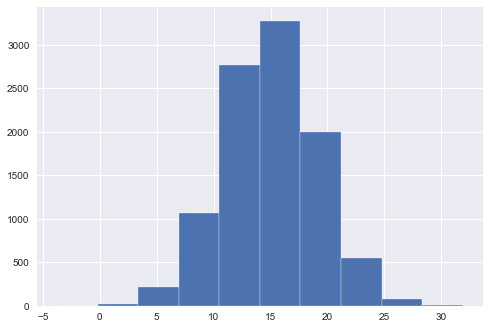

In [126]:
plt.hist(data);


See below for t-distribution plots for degree of freedom = [1,5,8]. Normal distribution with mean = 0 and var = 1 has also been shown. It can be seen that with increasing value of dof, the plot resembles more and more to normal distribution plot.

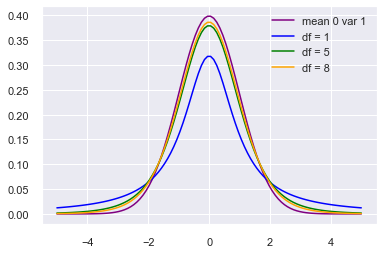

In [132]:
from scipy.stats import t
x = np.linspace(-5,5,100)
plt.plot(x, norm.pdf(x, loc = 0, scale = 1), '-',color = 'purple', label = 'mean 0 var 1')
plt.plot(x, t.pdf(x,1), color = 'blue', label = 'df = 1')
plt.plot(x, t.pdf(x,5), color = 'green', label = 'df = 5')
plt.plot(x, t.pdf(x,8), color = 'orange', label = 'df = 8')
plt.legend()
            

#### One Sample t-test

`t-test` is very similar to the hpyothesis test we saw earlier. In both test, we calculate the `p-value` and compare it with significance level. But there is one point to be noted. Unlike normal distribution, which can have any mean and std, t- distribution always have 0 mean and $\frac{df}{df-2}$ std (for $df$ >2). So, in normal distribution, we could calculate the `z-score` and use it to find relevant value from normal probability table. Or one can directly `norm.cdf` function to calculate `p-value`

But `t-distribution` is always centered around mean = 0, so we first need to calculate the `t-score` and then use it to calculate `p-value` by using `t.cdf` or `t.sf`

**Example**
The average time for all runners who finished the Cherry Blossom Race in 2006 was 93.29 minutes. The sample mean and sample standard deviation of the sample of 100 runners from the 2012 Cherry Blossom Race are 95.61 and 15.78 minutes,
respectively. Recall that the sample size is 100. We're interested in difference between means of both years. What is the `p-value` for the test, and what is your conclusion?

**Discussion** We can write hypotheses as follows - 

$H_0$: The average 10 mile run time was the same for 2006 and 2012. $\mu$ = 93.29 minutes.

$H_A$: The average 10 mile run time for 2012 was different than that of 2006. $\mu\;\neq
$ 93.29 minutes.

In [61]:
se_run = 15.78/10
t_score = (95.61-93.29)/se_run

pv = t.sf(t_score,99)
pv*2

0.14467449109616456

In [62]:
(1-norm.cdf(95.61,93.29,1.578))*2 
#this is very close the pv calculated above and this is expected. 
#For sample size > 30, t distribution is very close to normal distribution

0.14150340816602847

The `p-value` is 0.1447. Because the `p-value` is greater than 0.05, we do not reject the null hypothesis. That is, the data do not provide strong evidence that the average run time for the Cherry Blossom Run in 2012 is any different than the 2006 average.

#### 2 Sided t-Test
<div class="alert alert-block alert-warning">
The $p-value$ for the two-sided hypothesis testing problem

$H_0 : μ = μ_0$ versus $H_A : μ \neq μ_0$
$$$$
based on a data set of n observations with a sample mean $\overline{x}$ and a sample standard deviation $s$, is
$$$$
$$p-value = 2 × P(X ≥ |t|)$$
$$$$
where the random variable $X$ has a $t-distribution$ with $n − 1$ degrees of freedom, and
$$$$
$$t = \frac{(\overline{x}-\mu_0)}{SE}$$
$$$$
which is known as the $t-statistic$. This testing procedure is called a **two-sided t-test**.
</div>

As an illustration of the calculation of a $p-value$ for a two-sided hypothesis testing problem, consider the hypotheses

$H_0 : μ = 10.0$ versus $H_A : μ \neq 10.0$


Suppose that a data set is obtained with $n$ = 15, $\overline{x}$ = 10.6, and $s$ = 1.61. The $t-statistic$ is

$t = \frac{\sqrt{n}{(\overline{x}-\mu_0)}}{s}$

=
$t = \frac{\sqrt{15}(10.6-10)}{1.61}$ = 1.44

Therefore any data set with a $t-statistic$ larger than 1.44 or smaller than −1.44 is “worse” than
the observed data set. 

The $p-value$ is

$p-value = 2 × P(X ≥ 1.44)$

where the random variable $X$ has a $t-distribution$ with $n − 1$ = 14 degrees of freedom. `scipy.stats.t` module can be used to show that this value is

p-value = 2 × 0.086 = 0.172

![](images\pvalue.png)

In [142]:
from scipy.stats import t
tt = (10.6-10)/np.sqrt((1.61**2)/float(15)) # tt (t-statistic)= 1.4433
pval = t.sf(np.abs(tt), 14)*2  #t.sf is survival function (1-'cdf') at x of given RV. 
pval #same as calculated above 

0.17092448998084908

If you know the shaded area in the plot shown above, you can calculate corresponding `t` by using inverse survival function of t-distribution -

In [143]:
t.isf(.086, 14)

1.4394740509241577

Another example from Scipy docs given below. 

Note - I am slightly confused. What is the meaning of degree of freedom = 10 in below example? How is degree of freedom 14 (15-1) in above example ?

In [144]:
np.random.seed(22629734)
from scipy.stats import t
x = t.rvs(10, size = 1000) #random variables, degree of freedom 10, size 1000, loc and scale are 0 and 1 respectively

m, v, s, k = t.stats(10, moments = 'mvsk') #theoretical values, mean, variance, skew, kurtosis
n, (minmax), sm, sv, skew, skurt =  stats.describe(x)
np.mean(x), np.std(x), np.var(x)

(-0.04813218002818482, 1.1518319041316933, 1.3267167353756422)

In [145]:
m,v,s,k

(array(0.), array(1.25), array(0.), array(1.))

In [146]:
n, (minmax), sm, sv, skew, skurt

(1000, (-4.81247516246362, 7.0059600611489135), -0.04813218002818482, 1.328044780155798, 0.06661313913231239, 1.991537350719934)

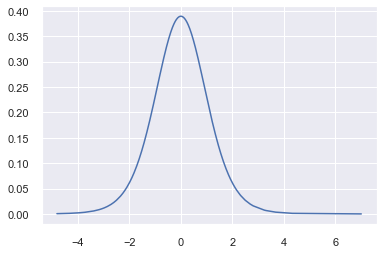

In [147]:
plt.plot(np.sort(x), t.pdf(np.sort(x), 10))

**Note:** - `stats.describe` uses the unbiased estimator for the variance, while `np.var` is the biased estimator.

In [148]:
tstats = (sm-m)/np.sqrt(sv/float(1000))
tstats

-1.3207760125273018

In [149]:
p_val = t.sf(tstats, 999)*2
p_val

1.8131214688157116

Or we can directly calculate the `t-statistic` and `p value` as shown below -

In [151]:
stats.ttest_1samp(x, m)

#Calculates the T-test for the mean of ONE group of scores.
#This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent 
#observations `a` is equal to the given population mean, `popmean`.

Ttest_1sampResult(statistic=-1.3207760125273018, pvalue=0.18687853118428843)

#### One Sided t-Test
<div class="alert alert-block alert-warning">
The $p-value$ for the two-sided hypothesis testing problem

$H_0 : μ \leq μ_0$ versus $H_A : μ \geq μ_0$

based on a data set of n observations with a sample mean $\overline{x}$ and a sample standard deviation $s$, is
$$$$
$$p-value = P(X ≥ t)$$
$$$$
and the p-value for the one-sided hypothesis testing problem


$H_0 : μ \geq μ_0$ versus $H_A : μ \leq μ_0$ is
$$$$
$$p-value = P(X ≤ t)$$
$$$$
where the random variable $X$ has a $t-distribution$ with $n − 1$ degrees of freedom, and
$$$$
$$t = \frac{\overline{x}-\mu_0}{SE}$$
$$$$
which is known as the $t-statistic$. 

This testing procedure is called a **one-sided t-test**.
</div>

#### Inference for Paired data

Suppose we have a list of books and we want to compare their prices from Amazon and a local bookstore. We can prepare the following table - 

|Book|Bookstore price|Amazon Price|Bookstore-Amazon diff|
|----|---------------|------------|---------------------|
|Book1|27.67|27.95|-0.28|
|Book2|40.59|31.64|9.45|
|..|..|..|..|

From this data, we can prepare following data - 

|$n_{diff}$|$\bar{x}_{diff}$|$s_{diff}$|
|----|----|----|
|73.0|12.76|14.26|

Now we want to determine whether, on average, there is a di↵erence between Amazon’s price for a book and the bookstore’s price. We write following hypotheses -

$H_0$: $\mu_{diff}\;=0$ . There is no difference in the average textbook price.

$H_A$: $\mu_{diff}\;\neq0$ . There is a difference in average prices.

In [63]:
ste = 14.26/np.sqrt(73)        #standard error
tsc = (12.76-0)/ste            #notice mean diff for null hypothesis is 0
tsc

7.645265623439809

In [64]:
pval = t.sf(tsc, 72)
pval*2

7.032497838235506e-11

The `p-value` we calculated above is very very small. Since it is less than .05, we reject the null hypothesis. 

The 95% confidence interval will be as follows - 



In [65]:
t.isf(.025,72) #t_{df,95}

1.9934635662785831

In [66]:
12.76-(1.99*ste),12.76+(1.99*ste)

(9.438676549556524, 16.081323450443477)

We are 95% confident that Amazon is, on average, between USD 9.44 and USD 16.08 cheaper than the bookstore.

#### Difference of Two Means

Here we consider the difference in two population means, $\mu_1-\mu_2$, under the condition that data is not paired. We'll use t-distribution with a point estimate of the difference $\bar{x}_1-\bar{x}_2$.

This section is motivated by questions like “Is there convincing evidence that newborns from mothers who smoke have a different average birth weight than newborns from mothers who don’t smoke?”

 - **Confidence Interval for a difference of 2 means**

We want to study the efficacy of of a treatment known as **ESC** vis a vis traditional treatment for heart related issues. For this we measure heart's pumping capacity before and after the treatment. Positive value means increased capacity which is taken as a sign of improved condition. Now we came up with following stats - 

|Group|$n$|$\bar{x}$|$s$|
|-----|---|---------|---|
|ESCs|9|3.50|5.17|
|Control|9|-4.33|2.76|

Note that control group is usually the group against which we wish to compare something 'interesting'.

The sample difference of two means, $\bar{x}_1-\bar{x}_2$, can be modeled using the t-distribution
and the standard error - 

$$\color{blue}{SE_{\bar{x}_1-\bar{x}_2} = \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

when each sample mean can itself be modeled using a t-distribution and the samples are independent. To calculate the degrees of freedom, use statistical software or the smaller of ${n_1}-1$ and ${n_2}-1$ .

In [67]:
s_e = np.sqrt(((5.17)**2)/9+((2.76)**2)/9)
s_e

1.953529569209992

In [68]:
t.isf(.025,8) #t_{df,8}

2.306004135033371

95% Confidence interval -

In [69]:
x1x2 = 3.50-(-4.33) #point estimate of mean difference

x1x2 - 2.3*(s_e),x1x2 + 2.3*(s_e)

(3.3368819908170186, 12.32311800918298)

We are 95% confident that embryonic stem cells (ESCs) improve the heart’s pumping function in sheep that have suff
ered a heart attack by 3.32% to 12.34%.

???How do I find exact value of dof for above case???

 - **Hypothesis Tests based on a difference of in Means**
 
A survey was conducted to study the effect of smoking on weights of newborns. The survey was conducted on 150 women, of which 100 were non-smoker and 50 were smokers. Following is the summary of survey - 

|-|smoker|non smoker|
|-----|-----|-------|
|mean|6.78|7.18|
|std|1.43|1.60|
|sample size|50|100|

Null hypothesis represents case of no difference.

$H_0$: There is no difference between avg birth weights of both groups. That is, $\mu_s = \mu_{ns}$

$H_A$: There is difference between avg birth weights of both groups. That is, $\mu_s \neq \mu_{ns}$

For given data, point estimate will be - 

$\mu_{ns}-\mu_s$ = .40

Now we calculate the SE and t-score :-

In [70]:
np.sqrt(((1.60*1.60)/100)+((1.43*1.43)/50))

0.2578720613017238

In [71]:
tscore = (.40-0)/.2578
tscore

1.5515903801396433

Taking degree of freedom as 49 (smaller of 99 and 49), we calculate 2 sided `p-value` -

In [72]:
t.sf(tscore,49)*2

0.12719580570131486

This `p-value` is greater than the signiicance level of .05 so we fail to reject the null hypothesis. That is, there is not enough evidence to claim that there is difference between average wt of newborns from each group.

**Caution** Does above conclusion mean that smoking and newborn weights are unrelated?

Absolutely not. It is possible that there is some difference but we did not detect it. If there is a
difference, we made a Type 2 Error. Notice: we also don’t have enough information to, if there is an actual
difference, confidently say which direction that difference would be in.

If we made a Type 2 Error and there is a difference, what could we have done differently in data collection to be more likely to detect the difference?

We could have collected more data. If the sample sizes are larger, we tend to have a better shot at
finding a difference if one exists.

 - **Case Study : Two Versions of a Course Exam**
 
Below is the data - 

|Version|n|mean|std|min|max|
|---|---|---|---|--|--|
|A|30|79.4|14|45|100|
|B|27|74.1|20|32|100|

Now, we would like to evaluate whether the difference observed in the groups is so large that it provides convincing
evidence that Version B was more difficult (on average) than Version A.

Null hypothesis represents case of no difference.

$H_0$: There is no difference between avg birth weights of both groups. That is, $\mu_A = \mu_B$

$H_A$: There is difference between avg birth weights of both groups. That is, $\mu_A \neq \mu_B$



Our point estimate $\bar{x}_A-\bar{x}_B$ = 79.4-74.1 = 5.3

Calculating SE - 

In [73]:
np.sqrt(((14*14)/30)+((20*20)/27))

4.620405625932441

In [74]:
#t-score 

t_s = (5.3 - 0)/4.62
t_s

1.147186147186147

In [75]:
# 2 sided p-value
2*t.sf(t_s,26)

0.2617520294994035

Calculated `p-value` is greater than .05, we do not reject null hypothesis.

##### Pooled Standard Deviation Estimate 
Occasionally, two populations will have standard deviations that are so similar that they can
be treated as identical. In such cases, we can make the t-distribution approach slightly more precise by using a pooled standard deviation.

The **pooled standard deviation** of two groups is a way to use data from both
samples to better estimate the standard deviation and standard error. If s1 and s2 are
the standard deviations of groups 1 and 2 and there are good reasons to believe that the
population standard deviations are equal, then we can obtain an improved estimate of the
group variances by pooling their data:

$$\color{blue}{s_{pooled}^2 = \frac{s_1^2\times(n-1)+s_2^2\times(n-2)}{n_1+n_2-2}}$$

where $n_1$ and $n_2$ are the sample sizes, as before. To use this new statistic, we substitute $s^2_{pooled}$ in place of $s_1^2$ and $s^2_2$ in the standard error formula, and we use an updated formula for the degrees of freedom:

$$\color{blue}{df = n_1 + n_2 − 2}$$

#### Sampling Distribution of Difference between Means

The sampling distribution of the difference between means can be thought of as the distribution that would result if we repeated the following three steps over and over again: (1) sample n1 scores from Population 1 and n2 scores fromf Population 2, (2) compute the means of the two samples($M_1$ and $M_2$), and (3) compute the difference between means, 
$M_1$ and $M_2$. The distribution of the differeces  between means is the sampling distribution of difference between means. 

As you might expect, the mean of the sampling distribution of difference between mean is:

$$\mu_{M_1-M_2}=\mu_{1}-\mu_{2}$$

which says that the mean of the distribution of differences between sample means
is equal to the difference between population means. For example, say that the
mean test score of all 12-year-olds in a population is 34 and the mean of 10-year- olds is 25. If numerous samples were taken from each age group and the mean difference computed each time, the mean of these numerous differences between sample means would be $34 - 25 = 9$.

From the variance sum law, we know that:

$$\sigma^2_{M_1-M_2}=\sigma^2_{M_1}+\sigma^2_{M_2}$$

which says that the variance of the sampling distribution of the difference between means is equal to the variance of the sampling distribution of the mean for Population 1 plus the variance of the sampling distribution of the mean for Population 2. Recall the formula for the variance of the sampling distribution of the mean:

$$variance\;of\;sampling\;distribution\;of\;mean = \frac{{\sigma}^2}{N}$$

Since we have two populations and two samples sizes, we need to distinguish between the two variances and sample sizes. We do this by using the subscripts 1 and 2. Using this convention, we can write the formula for the variance of the sampling distribution of the difference between means as:

$$\sigma^2_{M_1-M_2}=\frac{\sigma^2_{1}}{n_1}+\frac{\sigma^2_{2}}{n_2}$$

Since the standard error of a sampling distribution is the standard deviation of the sampling distribution, the standard error of the difference between means is:

$$\sigma_{M_1-M_2}=\sqrt{\frac{\sigma^2_{1}}{n_1}+\frac{\sigma^2_{2}}{n_2}}$$

**Note**

Rest of the chapter has been skipped (OpenIntro Statistics)

### Inference for Categorical Data

Based on Chapter 6 of OpenIntro Statistics

A sample proportion can be described as a sample mean. If we represent each “success” as a `1` and each “failure” as a `0`, then the sample proportion is the mean of these numerical outcomes:

$$\color{blue}{\hat{p} =\frac{0+1+1+0+1+0+---+1}{n}}$$

The distribution of $\hat{p}$ is nearly normal when the distribution of `0`’s and `1`’s is not too strongly skewed for the sample size. The most common guideline for sample size and skew when working with proportions is to ensure that we expect to observe a minimum number of successes (`1`’s) and failures (`0`’s), typically at least 10 of each. 

If

 - sample observations are independent, and
 - we see at least 10 cases of both `1`s and `0`s in our sample
 
then sampling distribution of $\hat{p}$ is nearly normal with the mean $p$ and and standard error

$$\color{blue}{SE_p = \sqrt{\frac{p(1-p)}{n}}}$$


Typically we don’t know the true proportion, $p$, so we substitute some value to check    
conditions and to estimate the standard error. For confidence intervals, usually the sample
proportion $\hat{p}$ is used to check the success-failure condition and compute the standard error.
For hypothesis tests, typically the null value – that is, the proportion claimed in the null
hypothesis – is used in place of $p$.

Note that in earlier parts, we actually used standard deviation of sampling distribution to calculate SE. Here we are using different approach. 

#### Confidence Interval for a Proportion

During Ebola virus outbreak, a doctor in New York city who had been treating Ebola patients was subsequently diagnosed with Ebola. Soon thereafter, a survey found that 82% respondents (out of 1042 participants) favored the 21-day mandatory  quarantine for any one who has come into contact with a Ebola patient.

In this case, our point estimate is sampling proportion, $\hat{p}$, with value of .82 for sample size of 1042.

Let us caculate the standard error of proportion - 


In [76]:
sep = np.sqrt((.82*(1-.82))/1042)
sep

0.011901708775845125

Now we can calculate the 95% confidence interval using the formula from chapter 4 - 

In [78]:
.82- (1.96*sep),.82+(1.96*sep)

(0.7966726507993435, 0.8433273492006564)

So we are 95% sure that the true proportion of New York adults who favored mandatory quarantine was between 79.67% to 84.33%.


#### Hypothesis Testing for a proportion

A simple random sample of 1028 US adults in 2013 found that 56% support nuclear arm reduction. Does the provide evidence for the claim that majority of Americans are in favor of nuclear arm reduction with significance level of .05?

Our hypotheses are -

$H_0$: $P$ = 0.50

$H_A$: $P\;\gt$ 0.50

Note that this is one sided hypothesis test.

First calculate the standard error - 


In [79]:
#important- unlike CI, the value of 'p' is of null hypothesis rather than of sample value.  
sep = np.sqrt((.5*(1-.5))/1028)
sep

0.015594571538795133

In [80]:
zscore = (.56-.5)/.016
zscore

3.750000000000003

In [81]:
pvalue = norm.sf(3.75)
np.round(pvalue,4)

#alternatively, use norm.sf(.56,.5,.015) to directly calculate pvalue

0.0001

This `pvalue` (= 0.0001) is way less than .05. This means Either null hpyothesis is false or this is unusually rare sample. That is, our sample doesn't support the null hypothesis. 

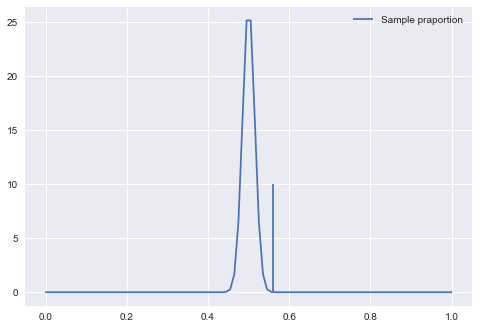

In [82]:
x = np.linspace(0,1,100)
plt.plot(x,norm.pdf(x,.5,.015))
plt.vlines(.56,0,10, label = 'Sample praportion')
plt.legend()

##### Choosing a sample size when estimating a proportion

When collecting data, we choose a sample size suitable for the purpose of the study. Often
times this means choosing a sample size large enough that the **margin of error** – which is
the part we add and subtract from the point estimate in a confidence interval – is sufficiently
small that the sample is useful. More explicitly, our task is to find a sample size **`n`** so that
the sample proportion is within some margin of error **`m`** of the actual proportion with a certain level of confidence.

**Example - **
A university newspaper is conducting a survey to determine what
fraction of students support a 200 dollar per year increase in fees to pay for a new football
stadium. How big of a sample is required to ensure the margin of error is smaller
than 0.04 using a 95% confidence level?

margin of error for 95% confidence = 1.96 * $\sqrt{\frac{p(1-p)}{n}}$

Our goal is to find the smallest sample size n so that this margin of error is smaller
than `m` = 0.04. Here both `n` and `p` are unknown. It shouldn't be too hard to see that $p(1-p)$ is highest when `p` = .5.
This means with `p` =.5, we'll get the highest margin of error. If this margin of error is less than specified `m`, then *any margin of error will be less than `m`*. So `p` = .5 represents the *worst case scenario*. 

We have following inequality - 

$$1.96 * \sqrt{\frac{p(1-p)}{n}} \lt .04$$

Solving for `p` = .5, we se that $n \gt 600.25$

We would need over 600.25 participants, which means we need 601 participants or more, to ensure the sample proportion is within 0.04 of the true proportion with 95% confidence.

##### Difference of two proportions

We would like to make conclusions about the di↵erence in two population proportions: $p_1 − p_2$. In our investigations, we first identify a reasonable point estimate of $p_1 − p_2$ based on the sample. You may have already guessed its form: $\hat{p_1} − \hat{p_2}$. Next, in each example we verify that the point estimate follows the normal model by checking certain conditions. Finally, we compute the estimate’s standard error and apply our inferential framework.

 - **Sample  distribution of the difference of two proportions**
 
The Standard Error of the Difference in sample proportions is

$$SE_{\hat{p_1}-\hat{p_2}} = \sqrt{{SE}^2_{\hat{p}_1}+{SE}^2_{\hat{p}_2}} = \sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}$$

where $p_1$ and $p_2$ represent the population proportions, and $n_1$ and $n_2$ represent
the sample sizes.

 - **Confidence interval for `p1-p2`**
 
Consider following example of a survey question - 

*As you may know, by 2014 nearly all Americans will be required to have
health insurance. [People who do not buy insurance will pay a penalty]
while [People who cannot afford it will receive financial help from the government].
Do you approve or disapprove of this policy?*

For each randomly sampled respondent, the statements in brackets were randomized:
either they were kept in the order given above, or the two statements were reversed.
Following table shows the results of this experiment. Create and interpret a 90% confidence
interval of the difference in approval

|-|Sample size|Approve(%)|Disapprove(%)|Other|
|------------|-------|----------|-----|--|
|“people who cannot afford it will receive financial help from the government” is given second|771|47|49|3|
|“people who do not buy it will pay a penalty” is given second|732|34|63|3|

Because all conditions are met, the normal model can be used for
the point estimate of the difference in support, where $p_1$ corresponds to the original
ordering and $p_2$ to the reversed ordering:

$$\hat{p_1}-\hat{p_2}= 0.47-0.34 =0.13$$

$$SE=\sqrt{\frac{.47(1-0.47)}{771}+\frac{.34(1-0.34)}{732}} = 0.025$$

For a 90% Confidence Interval, we use $z-score$ of 1.65:

In [83]:

a = .13-(1.65*(.025)) 
b = .13+(1.65*(.025))
a,b
                               

(0.08875, 0.17125)

We are 90% confident that the approval rating for the 2010 healthcare law changes
between 9% and 17% due to the ordering of the two statements in the survey question.

 - **Hpyothesis test for p1-p2**

A 30-year study was conducted with nearly 90,000 female participants. 

If mammograms are much more effective than non-mammogram breast cancer exams, then we would expect to see additional deaths from breast cancer in the control group. On the other hand, if mammograms are not as effective as regular breast cancer exams, we would expect to see an increase in breast cancer deaths in the mammogram group.


|-|Death from breast cancer?||
|-----|-----------|------|
| |$Yes$|$No$|
|Mammogram|500|44425|
|Control|505|44405|


$H_0$: the breast cancer death rate for patients screened using mammograms is the same as the breast
cancer death rate for patients in the control, $p_{mgm}-p_{ctrl} = 0$  

$H_A$: the breast cancer death rate for patients screened using mammograms is di↵erent than the breast cancer death rate for patients in the control, $p_{mgm}-p_{ctrl} \neq 0$

The details are very similar to that of confidence intervals. However,
this time we use a special proportion called the pooled proportion to check the successfailure
condition:

$$\hat{p} = \frac{total\;count \;of\; ppl\; who\; died\; of\; breast\; cancer}{total\; patients\; in \;the \;study}$$

$$\hat{p}= \frac{500+505}{500+44425+505+44405}=0.0112$$

**--skipped--**

##### Testing for goodness of fit using chi-square 

From a population, we took a sample of jurors consisting of 275 observations. We also have knowledge about population as shown below - 

|Race|White|Black|Hispanic|Other|Total|
|----|-----|-----|--------|-----|-----|
|Representation in juries|205|26|25|19|275|
|Registered Votes|.72|.07|.12|.09|1|

While the proportions in the juries do not precisely represent the population proportions,
it is unclear whether these data provide convincing evidence that the sample is not
representative. If the jurors really were randomly sampled from the registered voters, we
might expect small differences due to chance. However, unusually large differences may
provide convincing evidence that the juries were not representative

Based on this data, we can prepare another table which shows observed count vs expected count of jurors. 


|Race|White|Black|Hispanic|Other|Total|
|----|-----|-----|--------|-----|-----|
|Representation in juries|205|26|25|19|275|
|Expected Count|198|19.25|33|24.75|275|

The sample proportion represented from each race among the 275 jurors was not a
precise match for any ethnic group. While some sampling variation is expected, we would
expect the sample proportions to be fairly similar to the population proportions if there
is no bias on juries. We need to test whether the differences are strong enough to provide
convincing evidence that the jurors are not a random sample. These ideas can be organized
into hypotheses:

$H_0$: The jurors are a random sample, i.e. there is no racial bias in who serves on a jury,
and the observed counts reflect natural sampling fluctuation.

$H_A$: The jurors are not randomly sampled, i.e. there is racial bias in juror selection.

 - **The chi-square test statistic**
 
 
In previous hypothesis tests, we constructed a test statistic of the following form:
$$\frac{point\; estimate − null\; value}{SE \;of\;point\;estimate}$$ 

Our strategy will be to first compute the difference between the observed counts and
the counts we would expect if the null hypothesis was true, then we will standardize the
difference:


$$Z_1 = \frac{observed\; white \;count − null \;white\; count}
{SE \;of \;observed\; white\; count} = \frac{205-198}{\sqrt{198}} = 0.50$$


Similarily for black population - $Z_2$ = 1.54, for Hispanic, $Z_3$ = -1.39 and for other, $Z_2$ = -1.16.

We would like to use a single test statistic to determine if these four standardized di↵erences
are irregularly far from zero. That is, Z1, Z2, Z3, and Z4 must be combined somehow to
help determine if they – as a group – tend to be unusually far from zero. A first thought
might be to take the absolute value of these four standardized di↵erences and add them up:

$|Z_1| + |Z_2| + |Z_3| + |Z_4|$ = 4.58

Indeed, this does give one number summarizing how far the actual counts are from what
was expected. However, it is more common to add the squared values:

$Z_1^2 + Z_2^2 + Z_3^2+ Z_4^2$ = 5.89

We essentially calculated $\chi^2$ above. In general -

$$\chi^2 = \sum_i{\frac{({observed\;{count}_i-null\;{count}_i})^2}{null\;{count}_i}}$$

we will see that if the null hypothesis is true, then $\chi^2$
follows a new distribution called a **chi-square distribution**. Using this distribution, we will
be able to obtain a `p-value` to evaluate the hypotheses.

##### The chi-square distribution

The chi-square distribution is sometimes used to characterize data sets and statistics that are always positive and typically right skewed. Recall the normal distribution had two parameters – mean and standard deviation – that could be used to describe its exact characteristics. The chi-square distribution has just one parameter called **degrees of
freedom (df)**, which influences the shape, center, and spread of the distribution.

We determined that a large $\chi^2$ value would suggest strong evidence favoring the alternative hypothesis: that there was racial bias. However, we could not quantify what the chance was of observing such a large test statistic ($\chi^2$ = 5.89) if the null hypothesis actually was true. This is where the chi-square distribution becomes useful. If the null hypothesis
was true and there was no racial bias, then $\chi^2$ would follow a chi-square distribution, with three degrees of freedom in this case. Under certain conditions, the statistic $\chi^2$ follows a chi-square distribution with $k − 1$ degrees of freedom, where $k$ is the number of bins.

In [86]:
#Calculating pvalue. df is 3. 
from scipy.stats import chi2

1-chi2.cdf(5.89,3)

0.1170863469934531

Since this value is bigger than the usual significance limit of .05, we fail to reject null hypothesis. In other words, the data do not provide convinceing evidence of racial bias in the juror selection. 

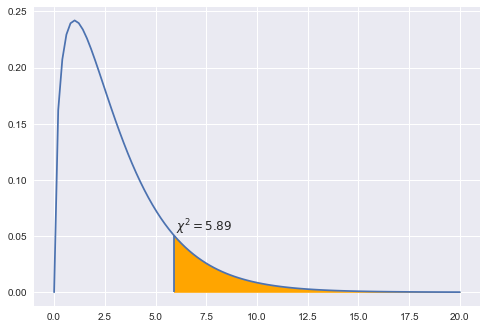

In [87]:
data = np.linspace(0,20,100)
r = np.linspace(5.89,20,30)
plt.plot(data, chi2.pdf(data,3))
plt.fill_between(r, chi2.pdf(r,3), color = 'orange')
plt.vlines(5.89,0,chi2.pdf(5.89,3))
plt.text(6,.055, '$\chi^2=5.89$');

#### Testing for independence in two-way tables

Suppose Google is testing 3 algorithms using a smaple of 10,000 search queries. See following table - 

|**Algorithm**|Current|Test 1|Test 2|Total|
|-------------|-------|------|------|-----|
|**Count**|5000|2500|2500|10000|

We can write following hypotheses - 

$H_0$-The algorithms each perform equally well

$H_A$-The algorithms do not perform equally well

In this experiment, the explanatory variable is the search algorithm. However, an outcome variable is also needed. This outcome variable should somehow reflect whether the search results align with the user’s interests. One possible way to quantify this is to determine whether (1) the user clicked one of the links provided and did not try a new
search, or (2) the user performed a related search. Under scenario (1), we might think that the user was satisfied with the search results. Under scenario (2), the search results probably were not relevant, so the user tried a second search.

now the different combinations of two variables are binned in a two-way table. In examining these data, we want to evaluate whether there is strong evidence that at least one algorithm is performing better than the others. To do
so, we apply a chi-square test to this two-way table. The ideas of this test are similar to those ideas in the one-way table case. However, degrees of freedom and expected counts are computed a little differently than before.

|**Algorithm**|Current|Test 1|Test 2|Total|
|-------------|-------|------|------|-----|
|**No new search**|3511|1749|1818|7078|
|**New search**|1489|751|682|2922|
|**Total**|5000|2500|2500|10000|

**What is so different about one-way tables and two-way tables?**

>A one-way table describes counts for each outcome in a single variable. A two-way
table describes counts for combinations of outcomes for two variables. When we
consider a two-way table, we often would like to know, are these variables related
in any way? That is, are they dependent (versus independent)?

The hypothesis test for this Google experiment is really accessing whether there is statistically significant evidence that the choice of the algorithm affects whether a user performs a second research. In other words, the goal is to check whether the `search` variable is independent of `algorithm` variable. 

**Working**

We see that out of total 10,000 observations, 7078 didn't perform new search. That is, 70.78% users didn't perform new search. We'd hope that same %age of users from each group didn't perform new search, provide null hypothesis is true. For example, we'd hope 70.87% (that is 1769.5) users from `Test 1` group didn't perform second search. 

This way, we can prepare another table which, alongwith observed data, also shows 'expected' data - 

|-|-|Observed vs (Expected) Counts|.|.|
|-------------|-------|------|------|-----|
|**Algorithm**|Current|Test 1|Test 2|Total|
|**No new search**|3511 (3539)|1749 (1769.5)|1818 (1769.5)|7078|
|**New search**|1489 (1461)|751 (730.5)|682 (730.5)|2922|
|**Total**|5000|2500|2500|10000|

Now we can use the formula for calculating $\chi^2$ which we mentioned earlier - 



In [88]:
chi_2 = (((3511-3539)**2)/3539)+(((1489-1461)**2)/1461)+(((1749-1769.5)**2)/1769.5)+(((751-730.5)**2)/730.5)+\
(((1818-1769.5)**2)/1769.5)+(((682-730.5)**2)/730.5) 
chi_2

6.12032270124296

Note that, in this case, degree of freedom will be (no of columns-1)\*(no of rows -1 ), that is, 2\*1 = 2. Now we can calculate the `pvalue` -

In [89]:
pvalue = 1-chi2.cdf(6.120,2)

In [90]:
pvalue

0.04688769521998848

This `pvalue` is less that the usual significance level of .05, so we reject the null hypothesis.

In [92]:
import pandas as pd
data = pd.DataFrame({'Red':[6,5,14,15,11,9],'Black':[9,10,12,11,8,10], 'Face':[1,2,3,4,5,6]}, columns = ['Face', 'Red', 'Black'])
data['Expected'] = pd.Series(np.ones(10)*10, dtype = int)
data

,Face,Red,Black,Expected
0,1,6,9,10
1,2,5,10,10
2,3,14,12,10
3,4,15,11,10
4,5,11,8,10
5,6,9,10,10


In [93]:
chi_stats = (data['Red']-data['Expected'])**2/data['Expected']
sum(chi_stats)

8.399999999999999

In [94]:
1-chi2.cdf(8.39999,5)

0.13552570885783255

### Binomial Distribution

Let there be an experiment with only two possible outcomes, say, a and b. Also p(a) = `p` and therefore p(b) = `1- p`. 
Let there be `n` trials of this experiment and we are interested in event `a` which has a probability of happening `p`. Also, we want to caculate the probability of getting `k` successes out of `n` trials (that is event `a` happens `k` times out of `n` trials). We can calculate the probability by using following formula - 

<div class="alert alert-block alert-warning">
$$prob(k,n,p) = \begin{pmatrix}
n\\
k
\end{pmatrix}{p^k}{(1-p)^{n-k}}$$
</div>
where

$$\begin{pmatrix}
n\\
k
\end{pmatrix} = \frac{n!}{k!(n-k)!}$$


$Mean = np$

$Variance = np(1-p)$

##### Example 

Suppose we have a bias coin and for this coin, getting head has the probability of .3. Then the probability that we would get 2 heads in 6 trials is calculated as shown below.

Here n = 6, k = 2 and p  = .3. By using above formula get the value of .3241. 





### Poisson Distribution

This is a discrete probability distribution that expresses the probability of a given number of events occuring in a fixed interval of a time or space if these events occur with a known constant rate and independently of the time since the last event. Let $\lambda$ be the average rate of event occuring, then for $k$ = 0,1,2.. -

$$pmf = \frac{\lambda^k{e^{-\lambda}}}{k!}$$

and $$mean = variance  = \lambda$$

**Relation with Binomial Distribution**

Poission distribution is just a special case of the binomial - where the number of trials is large and the probability of success in any given one is small.

If we define a number 

$$\lambda = np \Rightarrow p = \frac{\lambda}{n}$$

and let this be the rate of successes for a given duration. It is equal to $np$. That is the number of trials $n$-however many there are-times the chances of success $p$ for each of those trials. 

From binomial distribution, we have - 

$$prob(k,n,p) = \begin{pmatrix}
n\\
k
\end{pmatrix}{p^k}{(1-p)^{n-k}}$$

Putting $p = \frac{\lambda}{n}$ in above equation and taking the limit for $N \rightarrow \; \infty$, we can get -

$$pmf = \frac{\lambda^k{e^{-\lambda}}}{k!}$$

#### Degrees of Freedom

Some estimates are based on more information than others. For example, an estimate of the variance based on a sample size of 100 is based on more information than an estimate of the variance based on a sample size of 5. The degrees of freedom (df) of an estimate is the number of independent pieces of information on which the estimate is based.
As an example, let's say that we know that the mean height of Martians is 6 and wish to estimate the variance of their heights. We randomly sample one Martian and find that its height is 8. Recall that the variance is defined as the mean squared deviation of the values from their population mean. We can compute the squared deviation of our value of 8 from the population mean of 6 to find a single squared deviation from the mean. This single squared deviation from the mean $(8-6)^2 = 4$ is an estimate of the mean squared deviation for all Martians. Therefore, based on this sample of one, we would estimate that the population variance is 4. This estimate is based on a single piece of information and therefore has 1 df. If we sampled another Martian and obtained a height of 5, then we could compute a second estimate of the variance, $(5-6)^2 = 1$. We could then average our two estimates (4 and 1) to obtain an estimate of 2.5. Since this estimate is based on two independent pieces of information, it has two degrees of freedom. The two estimates are independent because they are based on two independently and randomly selected Martians. The estimates would not be independent if after sampling one Martian, we decided to choose its brother as our second Martian.

As you are probably thinking, it is pretty rare that we know the population mean when we are estimating the variance. Instead, we have to first estimate the population mean (μ) with the sample mean (M). The process of estimating the mean affects our degrees of freedom as shown below.

Returning to our problem of estimating the variance in Martian heights, let's assume we do not know the population mean and therefore we have to estimate it from the sample. We have sampled two Martians and found that their heights are 8 and 5. Therefore M, our estimate of the population mean, is M =  (8 + 5)/2 = 6.5

We can now compute two estimates of variance:

      Estimate 1 = (8-6.5)2 = 2.25
      Estimate 2 = (5-6.5)2 = 2.25


Now for the key question: Are these two estimates independent? The answer is no because each height contributed to the calculation of M. Since the first Martian's height of 8 influenced M, it also influenced Estimate 2. If the first height had been, for example, 10, then M would have been 7.5 and Estimate 2 would have been (5-7.5)2 = 6.25 instead of 2.25. The important point is that the two estimates are not independent and therefore we do not have two degrees of freedom. 

In general, the degrees of freedom for an estimate is equal to the number of values minus the number of parameters estimated en route to the estimate in question. In the Martians example, there are two values (8 and 5) and we had to estimate one parameter (μ) on the way to estimating the parameter of interest ($σ^2$). Therefore, the estimate of variance has 2 - 1 = 1 degree of freedom. If we had sampled 12 Martians, then our estimate of variance would have had 11 degrees of freedom. Therefore, the degrees of freedom of an estimate of variance is equal to N - 1 where N is the number of observations.

Recall that the formula for estimating the variance in a sample is:

$$s^2 = \frac{\Sigma(X-\overline{x})^2}{n-1}$$

The denominator of this formula is the degrees of freedom.

### Characteristics of Estimators

Let's compare two weighing scales. Scale 1 is a very high-tech digital scale and gives essentially the same weight each time you weigh yourself; it varies by at most 0.02 pounds from weighing to weighing. Although this scale has the potential to be very accurate, it is calibrated incorrectly and, on average, overstates your weight by one pound. Scale 2 is a cheap scale and gives very different results from weighing to weighing. However, it is just as likely to underestimate as overestimate your weight. Sometimes it vastly overestimates it and sometimes it vastly underestimates it. However, the average of a large number of measurements would be your actual weight. Scale 1 is biased since, on average, its measurements are one pound higher than your actual weight. Scale 2, by contrast, gives unbiased estimates of your weight. However, Scale 2 is highly variable and its measurements are often very far from your true weight. Scale 1, in spite of being biased, is fairly accurate. Its measurements are never more than 1.02 pounds from your actual weight.

#### Bias

A statistic is biased if the long-term average value of the statistic is not the parameter it is estimating. More formally, a statistic is biased if the mean of the sampling distribution of the statistic is not equal to the parameter. The mean of the sampling distribution of a statistic is sometimes referred to as the expected value of
the statistic.

As we saw elsewhere that the sampling distribution of the mean, the mean of the sampling distribution of the (sample) mean is the population mean (μ). Therefore the sample mean is an unbiased estimate of μ. Any given sample mean may underestimate or overestimate μ, but there is no systematic tendency for sample means to either under or overestimate μ.

We know that the formula for the variance in a population is - 

$$\color{blue}{variance({\sigma}^2)= \frac{\Sigma({x - \mu})^2}{n}}$$

whereas the formula to estimate the variance from a sample is

$$\color{blue}{variance({s}^2) = \frac{\Sigma({x - \overline{x}})^2}{n-1}}$$

Notice that the denominators of the formulas are different: $n$ for the population
and $n-1$ for the sample. If $n$ is used in the formula for $s^2$, then the estimates tend to
be too low and therefore biased. The formula with $n-1$ in the denominator gives an unbiased estimate of the population variance. Note that $n-1$ is the degrees of freedom.

#### Sampling Variability

The sampling variability of a statistic refers to how much the statistic varies from sample to sample and is usually measured by its standard error; the smaller the standard error, the less the sampling variability. For example, the standard error of the mean is a measure of a sampling variability of the mean. Recall that the formula for the standard error of the mean is -  
 
 $$\color{blue}{Standard\;Error =  \frac{s}{\sqrt{n}}}$$
 
 for sample standard deviation `s` and number of samples `n`.
 
The larger the sample size ($n$), the smaller the standard error of the mean and therefore the lower the sampling variability.

Statistics differ in their sampling variability even with the same sample size. For example, for normal distributions, the standard error of the median is larger than the standard error of the mean. The smaller the standard error of a statistic, the more efficient the statistic. The relative efficiency of two statistics is typically defined as the ratio of their standard errors. However, it is sometimes defined as the ratio of their squared standard errors.